# **E-Commerce Sales & Customer Analytics Project**

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv('/content/E-Commerce Sales & Customer Analytics.csv')

In [68]:
df

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_001337,CUST_01337,01-01-2023,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5
1,ORD_004885,CUST_04885,01-01-2023,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3
2,ORD_004507,CUST_04507,01-01-2023,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2
3,ORD_000645,CUST_00645,01-01-2023,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4
4,ORD_000690,CUST_00690,01-01-2023,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ORD_001048,CUST_01048,26-03-2024,18,Female,Izmir,Beauty,130.35,1,27.30,103.05,Bank Transfer,Mobile,17,10,False,9,1
4996,ORD_001051,CUST_01051,26-03-2024,27,Male,Adana,Beauty,71.55,1,0.00,71.55,Debit Card,Mobile,13,9,True,6,4
4997,ORD_003543,CUST_03543,26-03-2024,45,Female,Antalya,Food,39.38,1,5.27,34.11,Digital Wallet,Mobile,38,10,True,5,4
4998,ORD_004443,CUST_04443,26-03-2024,41,Female,Istanbul,Fashion,171.19,1,0.00,171.19,Credit Card,Mobile,20,12,True,5,4


In [69]:
df.head()

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_001337,CUST_01337,01-01-2023,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5
1,ORD_004885,CUST_04885,01-01-2023,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3
2,ORD_004507,CUST_04507,01-01-2023,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2
3,ORD_000645,CUST_00645,01-01-2023,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4
4,ORD_000690,CUST_00690,01-01-2023,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order_ID                  5000 non-null   object 
 1   Customer_ID               5000 non-null   object 
 2   Date                      5000 non-null   object 
 3   Age                       5000 non-null   int64  
 4   Gender                    5000 non-null   object 
 5   City                      5000 non-null   object 
 6   Product_Category          5000 non-null   object 
 7   Unit_Price                5000 non-null   float64
 8   Quantity                  5000 non-null   int64  
 9   Discount_Amount           5000 non-null   float64
 10  Total_Amount              5000 non-null   float64
 11  Payment_Method            5000 non-null   object 
 12  Device_Type               5000 non-null   object 
 13  Session_Duration_Minutes  5000 non-null   int64  
 14  Pages_Vi

In [71]:
df.describe()

,Age,Unit_Price,Quantity,Discount_Amount,Total_Amount,Session_Duration_Minutes,Pages_Viewed,Delivery_Time_Days,Customer_Rating
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000
mean,35.032600,455.834120,2.220000,24.852804,983.108914,14.57340,8.98420,6.497000,3.902800
std,11.080546,712.477209,1.398711,88.385124,1898.978528,8.66575,2.80434,3.464966,1.128542
min,18.000000,5.180000,1.000000,0.000000,7.870000,1.00000,1.00000,1.000000,1.000000
25%,27.000000,76.587500,1.000000,0.000000,122.517500,8.00000,7.00000,4.000000,3.000000
50%,35.000000,182.950000,2.000000,0.000000,337.910000,13.00000,9.00000,6.000000,4.000000
75%,42.000000,513.930000,3.000000,8.760000,979.695000,19.00000,11.00000,8.000000,5.000000
max,75.000000,7159.450000,5.000000,1525.550000,22023.900000,73.00000,24.00000,25.000000,5.000000


# **DATA CLEANING FOR ANALYSIS**

Convert Date Column

     This is mandatory for:

            Monthly trends

            Time-based analysis

            Forecasting later

In [72]:
# df['Date'] = pd.to_datetime(df['Date'])

# To Convert it, an error occurs because in date col there are different
             # formats of dates

### ERROR - Mixed date formats

Date column contains mixed date formats, for example:

          •	01-13-2023 → MM-DD-YYYY

          •	13-01-2023 → DD-MM-YYYY


In [73]:
df['Date']

,Date
0,01-01-2023
1,01-01-2023
2,01-01-2023
3,01-01-2023
4,01-01-2023
...,...
4995,26-03-2024
4996,26-03-2024
4997,26-03-2024
4998,26-03-2024


In [74]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Date']

,Date
0,2023-01-01
1,2023-01-01
2,2023-01-01
3,2023-01-01
4,2023-01-01
...,...
4995,2024-03-26
4996,2024-03-26
4997,2024-03-26
4998,2024-03-26


Create a Month Column

        This will help us answer:

        “How are sales changing over time?”

In [75]:
df['Month'] = df['Date'].dt.to_period('M')
df[['Date', 'Month']].head()

,Date,Month
0,2023-01-01,2023-01
1,2023-01-01,2023-01
2,2023-01-01,2023-01
3,2023-01-01,2023-01
4,2023-01-01,2023-01


In [76]:
df['Month']

,Month
0,2023-01
1,2023-01
2,2023-01
3,2023-01
4,2023-01
...,...
4995,2024-03
4996,2024-03
4997,2024-03
4998,2024-03


#  **REAL BUSINESS ANALYSIS**

# **STEP 1 : MONTHLY SALES TREND ANALYSIS**

###  How do total sales change over time?

Group by a single column

            groupby('Month') → groups rows by Month

            ['Total_Amount'] → selects the column to aggregate

            .sum() → sums total sales for each month

In [77]:
monthly_sales = df.groupby('Month')['Total_Amount'].sum()
monthly_sales.head()


,Total_Amount
Month,
2023-01,286694.32
2023-02,338784.92
2023-03,321716.01
2023-04,257332.58
2023-05,351902.03


## VISUALIZE MONTHLY SALES TREND

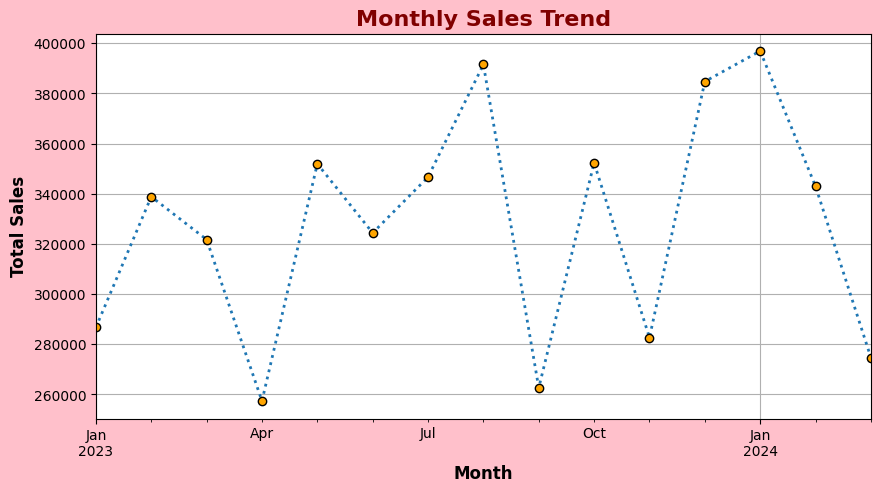

In [78]:
plt.figure(figsize=(10,5),facecolor='pink')
monthly_sales.plot( marker='o', markeredgecolor='black',markerfacecolor='orange', linestyle=':',linewidth=2,alpha=1,markersize=6)
plt.title('Monthly Sales Trend',fontsize=16,fontweight='bold',color='maroon')

plt.ylabel('Total Sales', fontsize=12, fontweight='bold')
plt.xlabel('Month',fontsize=12, fontweight='bold')

plt.grid(True)
plt.show()

Group by multiple columns (if needed)

If you want to group by Month and Product_Category:

        Here ['Month','Product_Category'] → list of columns to group by

        Always pass a list with square brackets []

        Then select the column to aggregate ['Total_Amount']



In [79]:
monthly_category_sales = df.groupby(['Month','Product_Category'])['Total_Amount'].sum()
monthly_category_sales

Month    Product_Category
2023-01  Beauty                9115.35
         Books                 3638.86
         Electronics         141705.32
         Fashion              15095.86
         Food                  5487.85
                               ...    
2024-03  Fashion              14744.96
         Food                  4703.13
         Home & Garden        40365.74
         Sports               50414.39
         Toys                 12331.82
Name: Total_Amount, Length: 120, dtype: float64

#  **STEP 2: CATEGORY-WISE REVENUE ANALYSIS**

In [80]:
category_sales = df.groupby('Product_Category')['Total_Amount'].sum().sort_values(ascending=False)
category_sales


,Total_Amount
Product_Category,
Electronics,2328806.81
Home & Garden,908348.86
Sports,754563.56
Fashion,375214.93
Toys,223142.48
Beauty,156584.74
Food,96138.67
Books,72744.52


## VISUALIZE CATEGORY-WISE REVENUE

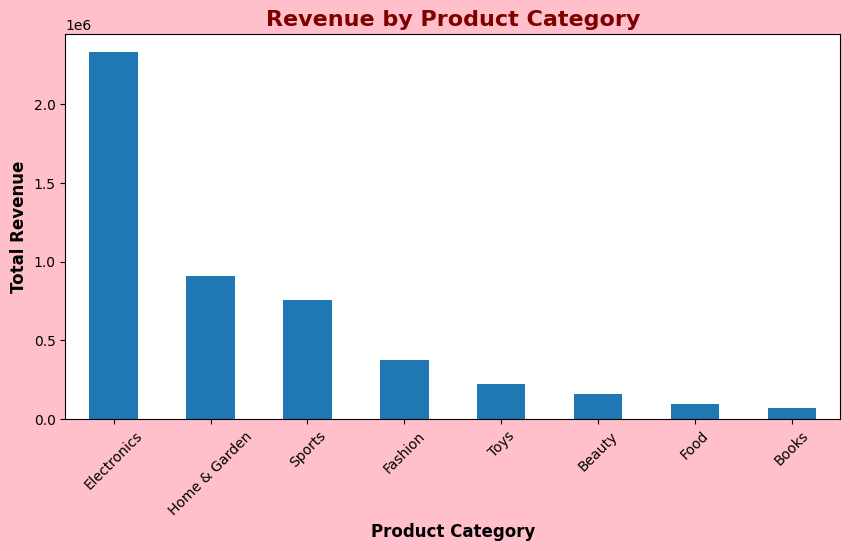

In [81]:
plt.figure(figsize=(10,5),facecolor='pink')
category_sales.plot(kind='bar')
plt.title('Revenue by Product Category',color='maroon',fontsize=16,fontweight='bold')

plt.ylabel('Total Revenue',fontsize=12,fontweight='bold')
plt.xlabel('Product Category',fontsize=12,fontweight='bold')

plt.xticks(rotation=45)
plt.show()

# **STEP 3: CUSTOMER BEHAVIOUR ANALYSIS**

## **New vs Returning Customers – Revenue Analysis**

### Do returning customers generate more revenue than new customers?

In [82]:
customer_type_sales = df.groupby('Is_Returning_Customer')['Total_Amount'].sum()
customer_type_sales

,Total_Amount
Is_Returning_Customer,
False,1967523.73
True,2948020.84


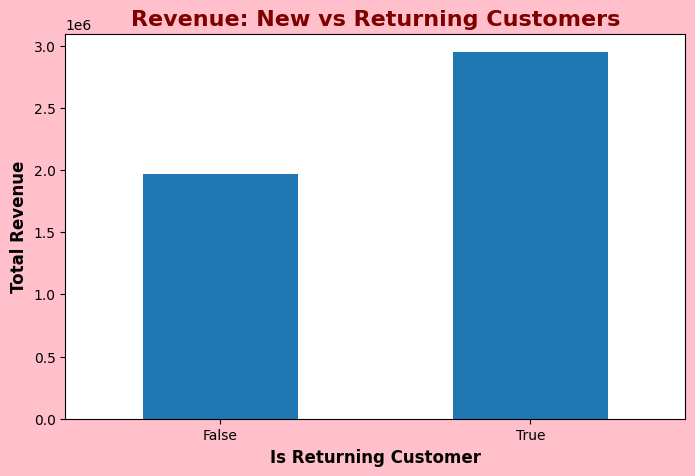

In [83]:
plt.figure(figsize=(8,5),facecolor='pink')
customer_type_sales.plot(kind='bar')
plt.title('Revenue: New vs Returning Customers',fontsize=16,fontweight='bold',color='maroon')
plt.ylabel('Total Revenue',fontsize=12, fontweight='bold')
plt.xlabel('Is Returning Customer',fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.show()

## **City-wise Revenue Analysis**

Which cities contribute the most revenue?

In [84]:
city_sales = df.groupby('City')['Total_Amount'].sum().sort_values(ascending=False)
city_sales.head(10)

,Total_Amount
City,
Istanbul,1334122.56
Ankara,657535.82
Izmir,567534.67
Bursa,459076.31
Adana,427059.63
Konya,344974.94
Gaziantep,318408.41
Antalya,315549.89
Kayseri,312303.91


### Visualization (Top 10 Cities)

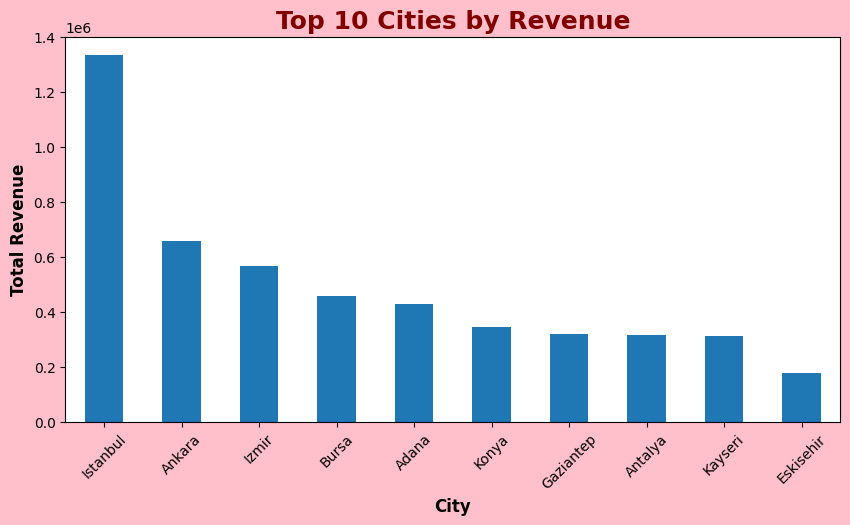

In [85]:
plt.figure(figsize=(10,5),facecolor='pink')
city_sales.plot(kind='bar')
plt.title('Top 10 Cities by Revenue',fontsize=18,fontweight='bold',color='maroon')

plt.ylabel('Total Revenue',fontsize=12,fontweight='bold')
plt.xlabel('City',fontsize=12, fontweight='bold')

plt.xticks()
plt.xticks(rotation=45)

plt.show()

# **STEP 5: CUSTOMER ENGAGEMENT & SATISFACTION**

## **Session Duration vs Revenue**

### Do customers who spend more time on the website spend more money?

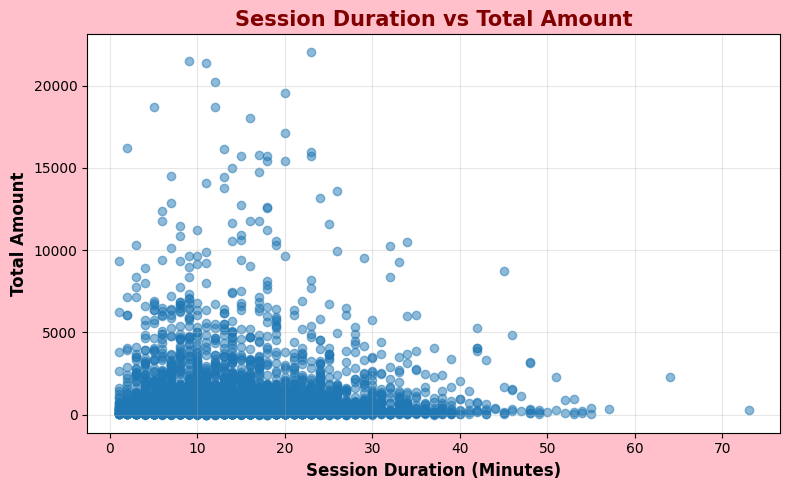

In [86]:
plt.figure(figsize=(8,5),facecolor='pink')
plt.scatter(df['Session_Duration_Minutes'], df['Total_Amount'], alpha=0.5)

plt.title('Session Duration vs Total Amount',fontsize=15,fontweight='bold',color='maroon')

plt.xlabel('Session Duration (Minutes)', fontsize=12, fontweight='bold')
plt.ylabel('Total Amount', fontsize=12, fontweight='bold')

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## **Pages Viewed vs Total Amount**

### Does browsing more pages lead to higher purchase value?

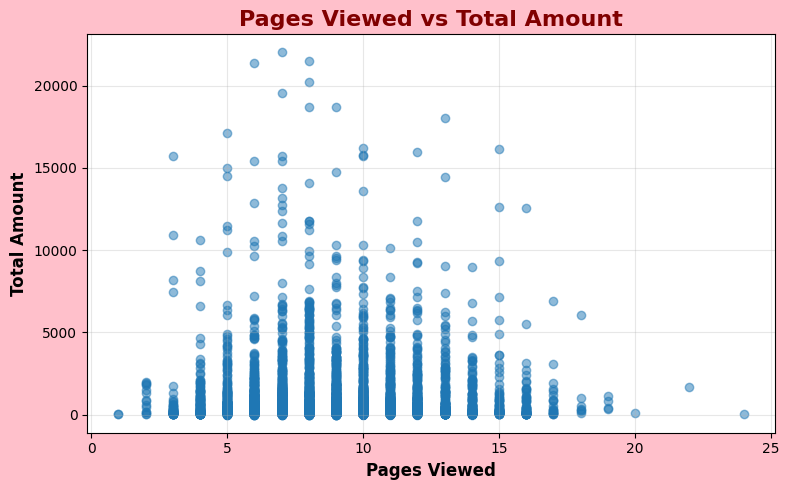

In [87]:
plt.figure(figsize=(8,5), facecolor='pink')

plt.scatter(df['Pages_Viewed'], df['Total_Amount'], alpha=0.5)

plt.title('Pages Viewed vs Total Amount', fontsize=16, fontweight='bold',color='maroon')

plt.xlabel('Pages Viewed', fontsize=12, fontweight='bold')
plt.ylabel('Total Amount', fontsize=12, fontweight='bold')

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## **Delivery Time vs Customer Rating**

### Does faster delivery lead to higher customer satisfaction?

In [88]:
delivery_counts = df['Delivery_Time_Days'].value_counts().sort_index()

delivery_counts.tail(10)


,count
Delivery_Time_Days,
16,25
17,21
18,18
19,9
20,9
21,3
22,3
23,3
24,2


### **Bubble Chart**

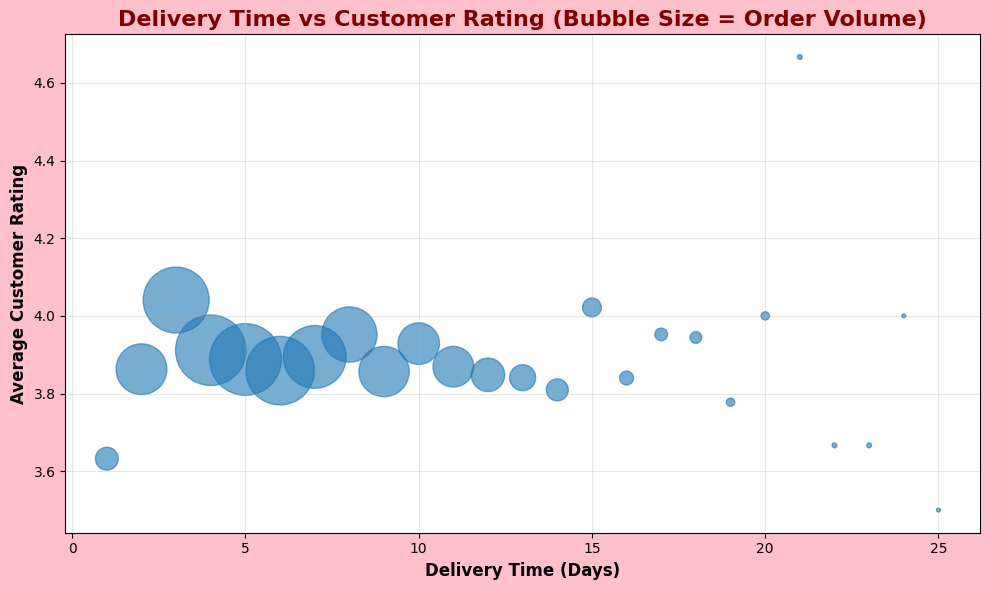

In [89]:
avg_rating = df.groupby('Delivery_Time_Days')['Customer_Rating'].mean()
order_count = df.groupby('Delivery_Time_Days')['Customer_Rating'].count()

plt.figure(figsize=(10,6), facecolor='pink')

plt.scatter(x=avg_rating.index,           # Delivery days
            y=avg_rating.values,          # Average rating
            s=order_count.values * 4,     # Bubble size = number of orders
            alpha=0.6)

plt.title('Delivery Time vs Customer Rating (Bubble Size = Order Volume)', fontsize=16, fontweight='bold',color='maroon')

plt.xlabel('Delivery Time (Days)', fontsize=12, fontweight='bold')
plt.ylabel('Average Customer Rating', fontsize=12, fontweight='bold')


plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



# **STEP 6: KPIs in Python**

In [90]:
total_revenue = df['Total_Amount'].sum()

total_orders = df['Order_ID'].nunique()

aov = total_revenue / total_orders

returning_customer_rate = df['Is_Returning_Customer'].mean() * 100

avg_delivery_time = df['Delivery_Time_Days'].mean()

avg_customer_rating = df['Customer_Rating'].mean()

# Print KPIs
print("KEY BUSINESS KPIs")
print("---------------------------------")
print(f"Total Revenue: {total_revenue:,.2f}")
print(f"Total Orders: {total_orders}")
print(f"Average Order Value (AOV): {aov:,.2f}")
print(f"Returning Customer Rate: {returning_customer_rate:.2f}%")
print(f"Average Delivery Time: {avg_delivery_time:.2f} days")
print(f"Average Customer Rating: {avg_customer_rating:.2f} / 5")


KEY BUSINESS KPIs
---------------------------------
Total Revenue: 4,915,544.57
Total Orders: 5000
Average Order Value (AOV): 983.11
Returning Customer Rate: 59.80%
Average Delivery Time: 6.50 days
Average Customer Rating: 3.90 / 5


## **KPI Summary Table**

In [91]:
  kpi_df = pd.DataFrame({ 'Metric': ['Total Revenue','Total Orders','Average Order Value',
                                    'Returning Customer Rate (%)','Average Delivery Time (Days)',
                                    'Average Customer Rating'],
                          'Value': [ round(total_revenue, 2), total_orders, round(aov, 2),
                                    round(returning_customer_rate, 2), round(avg_delivery_time, 2),
                                    round(avg_customer_rating, 2)]})

  kpi_df

,Metric,Value
0,Total Revenue,4915544.57
1,Total Orders,5000.00
2,Average Order Value,983.11
3,Returning Customer Rate (%),59.80
4,Average Delivery Time (Days),6.50
5,Average Customer Rating,3.90


## **Visual KPI Dashboard**

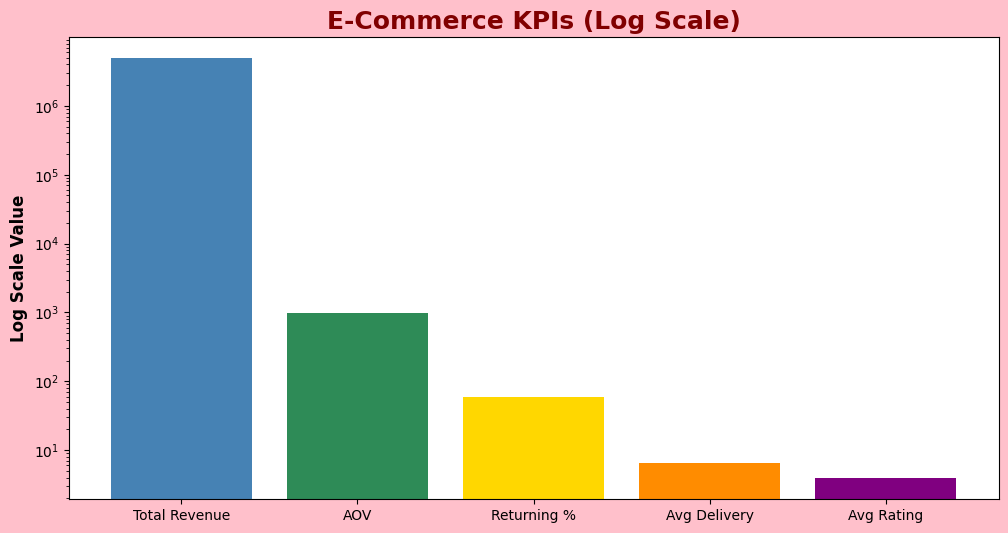

In [92]:
plt.figure(figsize=(12,6), facecolor='pink')
kpi_names = ['Total Revenue', 'AOV', 'Returning %', 'Avg Delivery', 'Avg Rating']
kpi_values = [total_revenue, aov, returning_customer_rate, avg_delivery_time, avg_customer_rating]

plt.bar(kpi_names, kpi_values,
        color=['steelblue', 'seagreen', 'gold', 'darkorange', 'purple'])

plt.yscale('log')
plt.title("E-Commerce KPIs (Log Scale)", fontsize=18, fontweight='bold',color='maroon')
plt.ylabel("Log Scale Value",fontsize=12, fontweight='bold')
plt.show()


### Downloading the file for excel

In [65]:
df.to_excel("Ecommerce_data.xlsx", index=False)

# **Insights**

## **Monthly Sales Trend – Insights**

1. Monthly sales show fluctuations, indicating seasonal demand patterns.

2. Sales peak in August 2023 and January 2024, likely due to festive or promotional periods.

3. Lower sales in some months suggest off-season demand or post-promotion slowdowns.

## **Category-wise Revenue Analysis – Insights**

1. Revenue varies significantly across product categories.

2. Electronics contributes the highest revenue, dominating overall sales.

3. Home & Garden and Sports act as strong secondary revenue contributors.

4. Books, Food, and Beauty generate comparatively lower revenue.

5. Revenue concentration in a few categories highlights opportunities for focused inventory planning and category-specific marketing strategies.

## **New vs Returning Customers – Insights**

1. Returning customers contribute higher total revenue compared to new customers.

2. This indicates strong customer loyalty and repeat purchasing behavior.

3. Retaining existing customers plays a significant role in overall revenue generation.

## **City-wise Revenue Analysis – Insights**

1. Revenue distribution varies significantly across cities.

2. Istanbul is the highest revenue-generating city by a large margin.

3. Ankara and Izmir are the next strongest contributors.

4. Mid-tier cities show moderate revenue performance.

5. Smaller cities contribute comparatively lower revenue.

## **Session Duration vs Total Amount – Insights**

1. Most purchases occur within short to medium session durations.

2. Higher spending is concentrated in 5–25 minute sessions.

3. Longer sessions do not necessarily result in higher spending.

## **Pages Viewed vs Total Amount – Insights**

1. Most purchases occur after viewing a moderate number of pages.

2. Higher-value purchases are concentrated within this range.

3. Excessive browsing does not necessarily lead to higher spending, indicating a weak relationship between pages viewed and purchase amount.

## **Delivery Time vs Customer Rating – Insights**

1. Most orders and reliable ratings occur between 3–8 delivery days

2. Higher ratings at longer delivery times are based on very few orders and are not representative.

3. Bubble size helps avoid misleading conclusions by considering order volume.

# **Project Conclusion**

*   Sales and customer behavior show clear seasonal and usage-based Patterns.

*   Revenue is concentrated across specific categories, cities, and customer types.

*   Customer engagement metrics such as session duration and pages viewed do not directly translate to higher spending.

*   Visualizations, KPIs, and dashboards helped convert raw data into clear, actionable insights.

*   The project demonstrates end-to-end data analysis skills using Python and Excel, from data preparation to insight generation.


